In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd
import os

from scipy.optimize import curve_fit

In [2]:
# This assumes the script is run in the `PlateReader` folder of the data repo
ds_ab_mg = pd.read_csv('Kinetics/Bulk_MG+MGA_annotated.csv')
ds_ab_dfhbi = pd.read_csv('Kinetics/Bulk_DFHBI+BrA_annotated.csv')

ds_c_mg = pd.read_csv('Kinetics/C_Ternary_Bulk_and_Droplets_MG+MGA_annotated.csv')
ds_c_dfhbi = pd.read_csv('Kinetics/C_Ternary_Bulk_and_Droplets_DFHBI+BrA_annotated.csv')

In [3]:
# Defining sample number - content dictionaries
samples_ab = {
    'Sample X1': 'Water', 
    'Sample X2' : 'IVTM', 
    'Sample X3' : 'A_bar', 
    'Sample X4' : 'A', 
    'Sample X5' : 'B_bar', 
    'Sample X6' : 'B', 
    'Sample X7' : 'B 1/2', 
    'Sample X8' : 'B 1/4'
}

samples_c = {
'Sample X1' : 'C', 
}

In [4]:
# Extracting Time arrays and converting from seconds to hours
time_ab = np.array(ds_ab_dfhbi['Time [s]'])/3600
time_c = np.array(ds_c_dfhbi['Time [s]'])/3600

In [5]:
def get_mean_std_from_dataset(dataset, sample_list, normalised = False): 
    
    def normalise(vec):
        return (vec - np.min(vec))/(np.max(vec) - np.min(vec))
    
    mean_dict = {}
    std_dict = {}
    for sample in sample_list: 
        mean_dict[sample_list[sample]] = []
        std_dict[sample_list[sample]] = []
        temp = []
        for rep in range(3): 
            if rep != 0: 
                sample_name = sample+'.'+str(rep)
            else: 
                sample_name = sample
            if normalised == False: 
                temp.append(np.array(dataset[sample_name]))
            elif normalised == True: 
                temp.append(normalise(np.array(dataset[sample_name])))

        temp_mean = np.mean(temp, axis = 0)
        temp_std = np.std(temp, axis = 0, ddof = 1)
        mean_dict[sample_list[sample]] = temp_mean
        std_dict[sample_list[sample]] = temp_std

    return mean_dict, std_dict

In [6]:
# First get raw/non-normalised results
normalisation = False
# A, B and corresponding non-sticky nanostars (A_bar, B_bar)
mg_ab_mean, mg_ab_std = get_mean_std_from_dataset(ds_ab_mg, samples_ab, normalised = normalisation)
dfhbi_ab_mean, dfhbi_ab_std = get_mean_std_from_dataset(ds_ab_dfhbi, samples_ab, normalised = normalisation)

# C
mg_c_mean, mg_c_std = get_mean_std_from_dataset(ds_c_mg, samples_c, normalised = normalisation)
dfhbi_c_mean, dfhbi_c_std = get_mean_std_from_dataset(ds_c_dfhbi, samples_c, normalised = normalisation)


# Recombine results
mg_mean = {**mg_ab_mean, **mg_c_mean}
mg_std = {**mg_ab_std, **mg_c_std}
dfhbi_mean = {**dfhbi_ab_mean, **dfhbi_c_mean}
dfhbi_std = {**dfhbi_ab_std, **dfhbi_c_std}

In [7]:
def process(dictionary, sample_list=None): 
    maxes = {}
    maxes_list = []
    if sample_list is None: 
        sample_list = dictionary.keys()
        
    
    maxes = {
        sample: np.max(dictionary[sample])
        for sample in sample_list
    }
    maxes_list = [np.max(dictionary[sample]) for sample in sample_list]
    
    maxes_ratios = {
        sample: maxes[sample]/np.max(maxes_list)
        for sample in sample_list
    }
    
    return maxes_ratios

In [8]:
# Compute ratios between maximum intensities to plot normalised intensities on corrective relative magnitude scales
maxes_mg_ratios = process(mg_mean)
maxes_dfhbi_ratios = process(dfhbi_mean)

maxes_c_mg_ratios = process(mg_mean, sample_list = ['Water', 'IVTM', 'C'])
maxes_c_dfhbi_ratios = process(dfhbi_mean, sample_list = ['Water', 'IVTM', 'C'])

In [9]:
# Compute normalised intensity profiles
normalisation = True

# A, B and corresponding non-sticky nanostars (A_bar, B_bar)
mg_ab_mean_norm, mg_ab_std_norm = get_mean_std_from_dataset(ds_ab_mg, samples_ab, normalised = normalisation)
dfhbi_ab_mean_norm, dfhbi_ab_std_norm = get_mean_std_from_dataset(ds_ab_dfhbi, samples_ab, normalised = normalisation)

# C
mg_c_mean_norm, mg_c_std_norm = get_mean_std_from_dataset(ds_c_mg, samples_c, normalised = normalisation)
dfhbi_c_mean_norm, dfhbi_c_std_norm = get_mean_std_from_dataset(ds_c_dfhbi, samples_c, normalised = normalisation)

# Recombine results
mg_mean_norm = {**mg_ab_mean_norm, **mg_c_mean_norm}
mg_std_norm = {**mg_ab_std_norm, **mg_c_std_norm}
dfhbi_mean_norm = {**dfhbi_ab_mean_norm, **dfhbi_c_mean_norm}
dfhbi_std_norm = {**dfhbi_ab_std_norm, **dfhbi_c_std_norm}

In [10]:
# Define colour dictionary
colours = {
    'Water' : 'cornflowerblue', 
    'IVTM' : 'sienna', 
    'B_bar' : 'darkcyan', 
    'B' : 'cyan', 
    'B 1/2' : 'darkturquoise', 
    'B 1/4' : 'paleturquoise', 
    'A_bar' : 'firebrick', 
    'A' : 'orangered', 
    'C' : 'gray', 
}

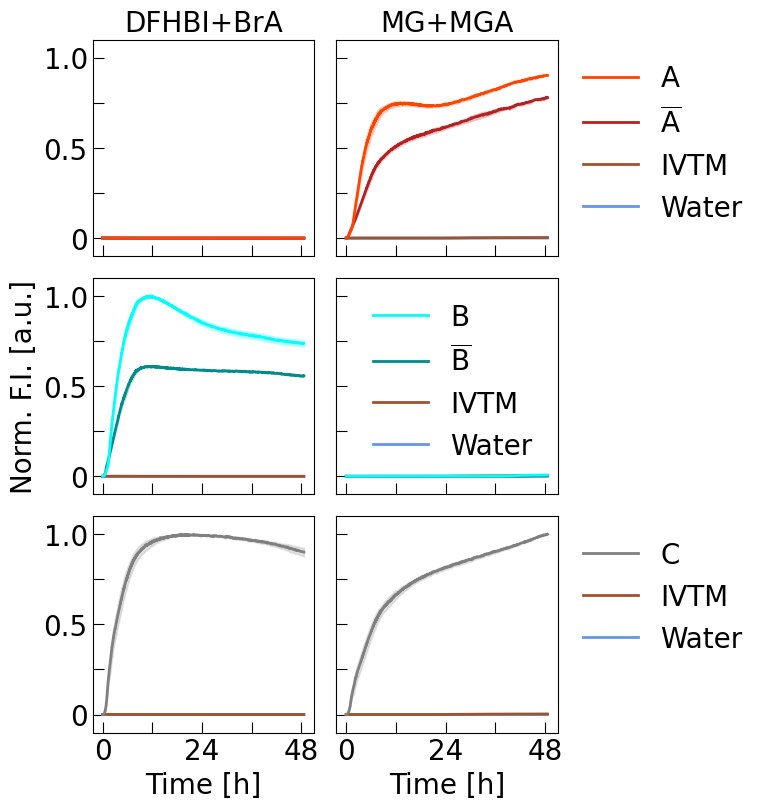

In [11]:
# Figure S13

labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'A_bar' : r'$\overline{A}$', 'A' : 'A', 
          'B_bar' : r'$\overline{B}$', 'B' : 'B',
          'C' : 'C'}
          
plt.rcParams['mathtext.default'] = 'regular'
plt.subplots(3, 2, figsize = (6, 9), sharey = False, sharex = True)
plt.subplots_adjust(wspace = 0.10, hspace = 0.10)
plt.subplot(321)

for sample in ['Water', 'IVTM', 'A_bar', 'A']: 
    plt.plot(time_ab, dfhbi_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_ab, (dfhbi_mean_norm[sample]- dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], 
                     (dfhbi_mean_norm[sample] + dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax1 = plt.gca()
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax1.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax1.tick_params(direction = 'in', length = 8)
ax1.set_ylim([-0.1, 1.1])
ax1.set_title('DFHBI+BrA', fontsize = 20)
#ax1.legend(frameon = False, fontsize = 20, bbox_to_anchor = [1.0, 1.0])

plt.subplot(322)
ax2 = plt.gca()
for sample in ['Water', 'IVTM', 'A_bar', 'A']: 
    ax2.plot(time_ab, mg_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax2.fill_between(time_ab, (mg_mean_norm[sample] - mg_std_norm[sample])*maxes_mg_ratios[sample], 
                     (mg_mean_norm[sample] + mg_std_norm[sample])*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax2.set_yticklabels([], fontsize = 20)
ax2.tick_params(direction = 'in', length = 8)
ax2.set_ylim([-0.1, 1.1])
ax2.set_title('MG+MGA', fontsize = 20)
handles, labels2 = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])




plt.subplot(323)

for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    plt.plot(time_ab, dfhbi_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_ab, (dfhbi_mean_norm[sample]- dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], 
                     (dfhbi_mean_norm[sample] + dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax3 = plt.gca()
ax3.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax3.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax3.tick_params(direction = 'in', length = 8)
ax3.set_ylim([-0.1, 1.1])
ax3.set_ylabel('Norm. F.I. [a.u.]', fontsize = 20)
#ax3.legend(frameon = False, fontsize = 20, bbox_to_anchor = [0.1, 1.0])


plt.subplot(324)
ax4 = plt.gca()
for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    ax4.plot(time_ab, mg_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax4.fill_between(time_ab, (mg_mean_norm[sample] - mg_std_norm[sample])*maxes_mg_ratios[sample], 
                     (mg_mean_norm[sample] + mg_std_norm[sample])*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    

ax4.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax4.set_yticklabels([], fontsize = 20)
ax4.tick_params(direction = 'in', length = 8)
ax4.set_ylim([-0.1, 1.1])
handles, labels2 = ax4.get_legend_handles_labels()
ax4.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])



plt.subplot(325)

for sample in ['Water', 'IVTM', 'C']: 
    plt.plot(time_ab, dfhbi_mean_norm[sample]*maxes_c_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_ab, (dfhbi_mean_norm[sample] - dfhbi_std_norm[sample])*maxes_c_dfhbi_ratios[sample], 
                     (dfhbi_mean_norm[sample] + dfhbi_std_norm[sample])*maxes_c_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax5 = plt.gca()
ax5.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax5.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax5.tick_params(direction = 'in', length = 8)
ax5.set_ylim([-0.1, 1.1])
ax5.set_xticks([0, 12, 24, 36, 48], labels = [0, '', 24, '', 48], fontsize = 20)
ax5.set_xlabel('Time [h]', fontsize = 20)
#ax5.legend(frameon = False, fontsize = 20, bbox_to_anchor = [0.1, 1.0])

plt.subplot(326)
ax6 = plt.gca()
for sample in ['Water', 'IVTM', 'C']: 
    ax6.plot(time_ab, mg_mean_norm[sample]*maxes_c_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax6.fill_between(time_ab, (mg_mean_norm[sample] - mg_std_norm[sample])*maxes_c_mg_ratios[sample], 
                     (mg_mean_norm[sample] + mg_std_norm[sample])*maxes_c_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    
ax6.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax6.set_yticklabels([], fontsize = 20)
ax6.tick_params(direction = 'in', length = 8)
ax6.set_ylim([-0.1, 1.1])
ax6.set_xticks([0, 12, 24, 36, 48], labels = [0, '', 24, '', 48], fontsize = 20)
ax6.set_xlabel('Time [h]', fontsize = 20);
handles, labels2 = ax6.get_legend_handles_labels()
ax6.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])
plt.show()

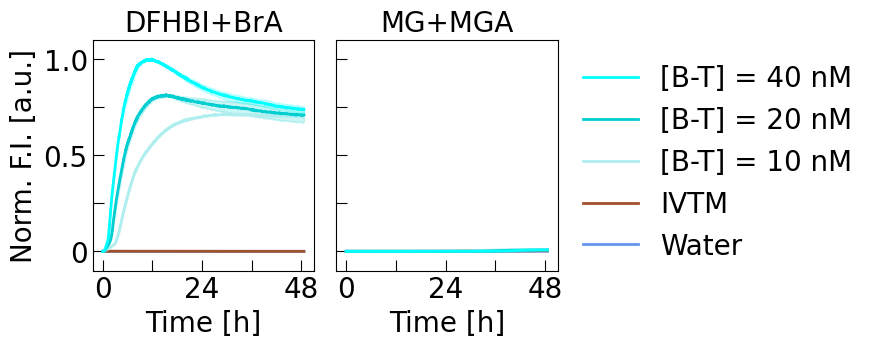

In [12]:
# Figure S14
labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'B 1/4' : r'[B-T] = 10 nM', 'B 1/2' : r'[B-T] = 20 nM', 'B' : r'[B-T] = 40 nM'}

plt.subplots(1, 2, figsize = (6, 3))
plt.subplots_adjust(wspace = 0.10)
plt.subplot(121)
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']:
    plt.plot(time_ab, dfhbi_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_ab, (dfhbi_mean_norm[sample]- dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], 
                     (dfhbi_mean_norm[sample] + dfhbi_std_norm[sample])*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax = plt.gca()
ax.set_ylabel('Norm. F.I. [a.u.]', fontsize = 20)
ax.tick_params(direction = 'in', length = 8)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20)
ax.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax.set_ylim([-0.1, 1.1])
ax.set_xticks([0, 12, 24, 36, 48])
ax.set_xticklabels([0, '', 24, '', 48], fontsize = 20)
ax.set_xlabel('Time [h]', fontsize = 20)
ax.set_title('DFHBI+BrA', fontsize = 20)

plt.subplot(122)
ax2 = plt.gca()
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']:
    ax2.plot(time_ab, mg_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax2.fill_between(time_ab, (mg_mean_norm[sample] - mg_std_norm[sample])*maxes_mg_ratios[sample], 
                     (mg_mean_norm[sample] + mg_std_norm[sample])*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    

ax2.tick_params(direction = 'in', length = 8)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [], fontsize = 20)
ax2.set_yticklabels([], fontsize = 20)
ax2.set_ylim([-0.1, 1.1])
ax2.set_title('MG+MGA', fontsize = 20)
ax2.set_xticks([0, 12, 24, 36, 48])
ax2.set_xticklabels([0, '', 24, '', 48], fontsize = 20)
ax2.set_xlabel('Time [h]', fontsize = 20)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])
plt.show()

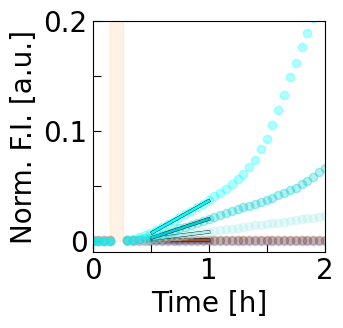

In [13]:
# Figure S15(i)
def line(x, m, c):
    return m*x + c


num_points = 30
slopes = {}
intercepts = {}

    
plt.figure(figsize = (3, 3))
plt.fill_betweenx([0, 0.2], time_ab[9], time_ab[10], color = 'darkorange', alpha = 0.1)
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']: 
    x = time_ab[25:25+num_points]
    y = dfhbi_mean_norm[sample]*maxes_dfhbi_ratios[sample]
    y = y[25:25+num_points]
    sigma_y = dfhbi_std_norm[sample]*maxes_dfhbi_ratios[sample]
    sigma_y = sigma_y[25:25+num_points]
    params, pcov = curve_fit(line, x, y, sigma = sigma_y)
    slopes[sample] = [params[0], np.sqrt(pcov[0, 0])]
    intercepts[sample] = params[1]
    line_fit = params[0]*x + params[1]
    
    plt.plot(time_ab, dfhbi_mean_norm[sample]*maxes_dfhbi_ratios[sample], ls = '', marker = 'o', ms = 6, markevery = 3, alpha = 0.3, label = 'Mean Normalised Profile', color = colours[sample])
    plt.plot(x, line_fit, lw = 2.0, color = colours[sample], label = 'Linear Fit', path_effects=[pe.Stroke(linewidth=2.5, foreground='k'), pe.Normal()])
plt.xlim([0, 2])
plt.ylim([-0.01, 0.2])
plt.xlabel('Time [h]', fontsize = 20)
plt.xticks([0, 0.5, 1, 1.5, 2], [0, '', 1, '', 2], fontsize = 20)
plt.ylabel('Norm. F.I. [a.u.]', fontsize = 20)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2], [0, '', 0.1, '', 0.2], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)

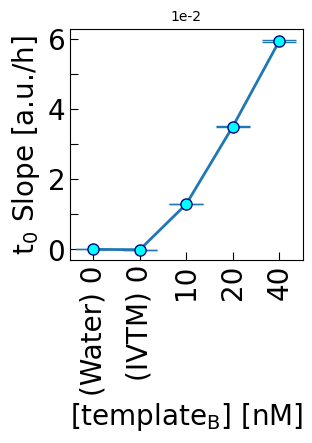

In [14]:
# Figure S15(ii)
plt.figure(figsize = (3, 3 ))
plt.errorbar([0, 1, 2, 3, 4], np.array(list(slopes.values()))[:, 0], np.array(list(slopes.values()))[:, 1],
             lw = 2.0, marker = 'o', mec = 'navy', mfc = 'cyan', ms = 8, 
            capsize = 12)
plt.xlabel(r'[template$_B$] [nM]', fontsize = 20)
plt.ylabel(r't$_0$ Slope [a.u./h]', fontsize = 20)
plt.xlim([-.5, 4.5])
plt.xticks([0, 1, 2, 3, 4], ['(Water) 0', '(IVTM) 0', '10', '20', '40'], fontsize = 20, rotation = 90)
plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], [0, '', 2, '', 4, '', 6], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)
plt.title('1e-2', fontsize = 10)
plt.show()